<a href="https://colab.research.google.com/github/Giovannasouza23/SI_tema9/blob/main/Smart_city.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simular a otimização do trânsito em 5 ruas.

1) Cria uma simulação com o fluxo total de 1000 veículos.
2) Vai distribuir os 1000 veículos entre 5 ruas, aleatoriamente.
3) Vai agrupar em número fixo de veículos para cada rua.
4) Retorno do que foi acrescentado ou diminuído em relação ao fluxo por rua.

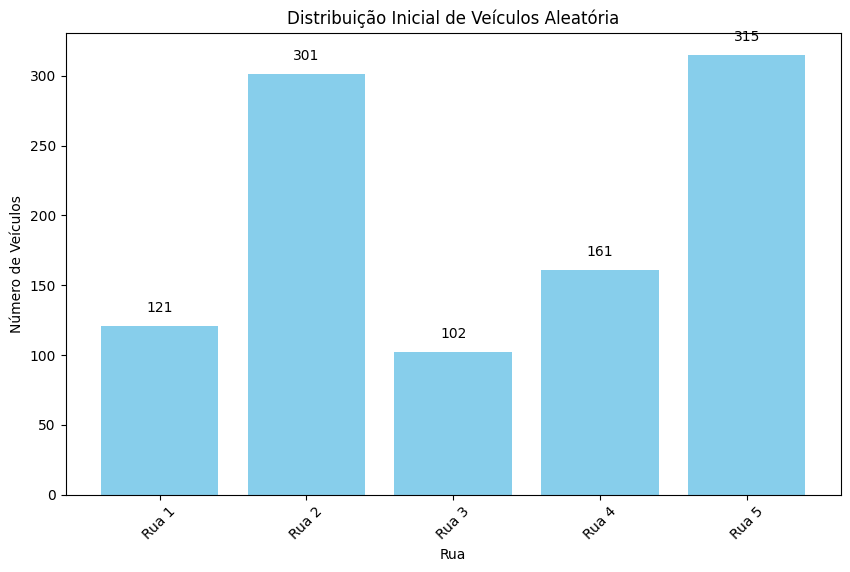

Total de Veículos Inicial: 1000


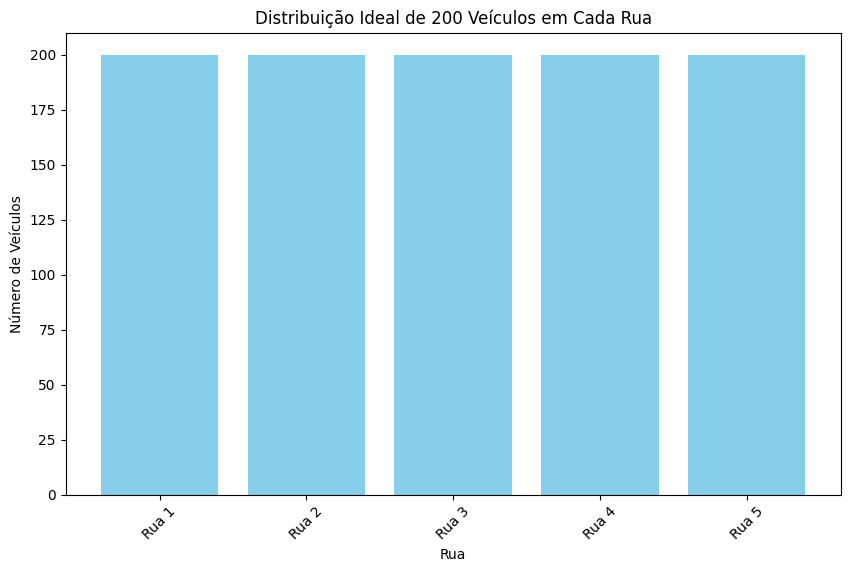

Rua 1 acrescentou 79 veículos.
Rua 2 diminuiu 101 veículos.
Rua 3 acrescentou 98 veículos.
Rua 4 acrescentou 39 veículos.
Rua 5 diminuiu 115 veículos.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Rua:
    def __init__(self, nome):
        self.nome = nome
        self.num_veiculos = 0

    def aumentar_veiculos(self, quantidade):
        self.num_veiculos += quantidade

    def diminuir_veiculos(self, quantidade):
        self.num_veiculos -= quantidade

    def zerar_veiculos(self):
        self.num_veiculos = 0

class CidadeInteligente:
    def __init__(self, num_ruas):
        self.ruas = [Rua(f"Rua {i+1}") for i in range(num_ruas)]

    def simular_distribuicao_inicial(self, num_veiculos_total):
        # Distribui aleatoriamente o número total de veículos entre as ruas
        veiculos_restantes = num_veiculos_total
        for rua in self.ruas[:-1]:
            veiculos_rua = np.random.randint(0, veiculos_restantes)
            rua.aumentar_veiculos(veiculos_rua)
            veiculos_restantes -= veiculos_rua
        self.ruas[-1].aumentar_veiculos(veiculos_restantes)

    def total_veiculos(self):
        return sum(rua.num_veiculos for rua in self.ruas)

    def visualizar_distribuicao_inicial(self):
        nomes_ruas = [rua.nome for rua in self.ruas]
        num_veiculos_ruas = [rua.num_veiculos for rua in self.ruas]

        plt.figure(figsize=(10, 6))
        plt.bar(nomes_ruas, num_veiculos_ruas, color='skyblue')
        plt.xlabel('Rua')
        plt.ylabel('Número de Veículos')
        plt.title('Distribuição Inicial de Veículos Aleatória')
        plt.xticks(rotation=45)

        # Adicionando rótulos com a quantidade de veículos em cada rua
        for i, v in enumerate(num_veiculos_ruas):
            plt.text(i, v + 10, str(v), ha='center')

        plt.show()

    def equalizar_veiculos(self, num_veiculos_por_rua):
        for rua in self.ruas:
            diferenca = num_veiculos_por_rua - rua.num_veiculos
            if diferenca > 0:
                rua.aumentar_veiculos(diferenca)
                print(f"{rua.nome} acrescentou {diferenca} veículos.")
            elif diferenca < 0:
                rua.diminuir_veiculos(-diferenca)
                print(f"{rua.nome} diminuiu {-diferenca} veículos.")

    def visualizar_distribuicao_ideal(self, num_veiculos_por_rua):
        nomes_ruas = [rua.nome for rua in self.ruas]
        num_veiculos_ideal = [num_veiculos_por_rua] * len(self.ruas)

        plt.figure(figsize=(10, 6))
        plt.bar(nomes_ruas, num_veiculos_ideal, color='skyblue')
        plt.xlabel('Rua')
        plt.ylabel('Número de Veículos')
        plt.title('Distribuição Ideal de 200 Veículos em Cada Rua')
        plt.xticks(rotation=45)
        plt.show()

cidade = CidadeInteligente(5)

# Distribuição inicial de veículos aleatória
cidade.simular_distribuicao_inicial(1000)
cidade.visualizar_distribuicao_inicial()

# Total de veículos inicial
total_veiculos_inicial = cidade.total_veiculos()
print("Total de Veículos Inicial:", total_veiculos_inicial)

# Distribuição ideal de 200 veículos em cada rua
cidade.visualizar_distribuicao_ideal(200)

# Equalizar o número de veículos em cada rua para 200
cidade.equalizar_veiculos(200)